<h1>HW5 - Generative Adversarial Networks (GANs)</h1>
<h3><font color=yellow>Total Points: 100</font></h3>



<font color=greeen>Please, name this file as HW5_Q7_{Student_ID}.ipynb</font>

<h2>Full Name: ------</h2>
<h2>Student ID: ------</h2>

# Init

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms

In [ ]:
# Data Preprocessing
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor()
])

# DataLoader
mnist_dataset = datasets.MNIST(root='./MNIST', train=True, transform=transform, download=True);
data_loader = torch.utils.data.DataLoader(dataset=mnist_dataset, batch_size=32, shuffle=True, num_workers=2);

# Part 1: Implementation of a Basic GAN

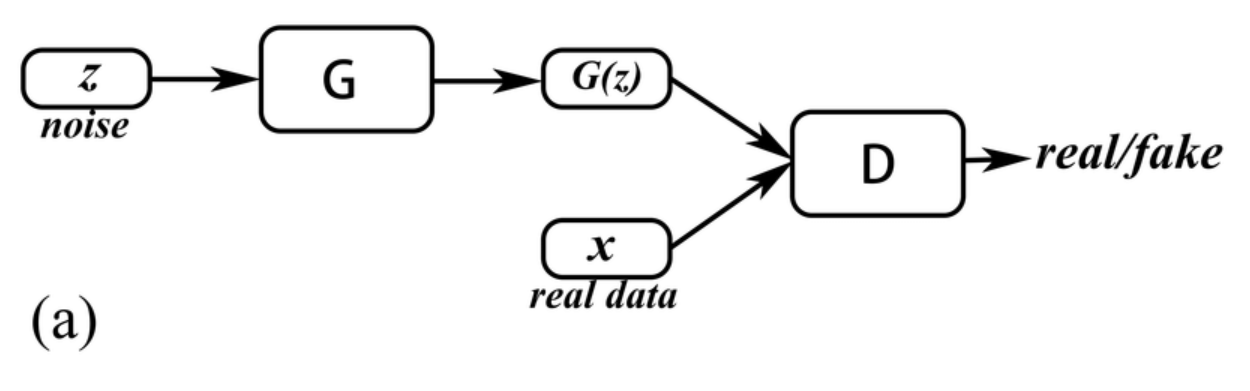

In this section, we will implement a basic Generative Adversarial Network (GAN) to generate fake images of handwritten digits using the MNIST dataset. The main components of this GAN include:

1. **Data Preprocessing**: Loading the MNIST dataset and applying necessary transformations.
2. **Generator**: A neural network that takes random noise as input and generates an image.
3. **Discriminator**: A neural network that takes an image as input and classifies it as real or fake.
4. **Training Loop**: Training the generator and discriminator in alternating steps.
5. **Results**: Visualizing the generated images and logging the training process.

Your task is to follow along with the provided code, understand the underlying concepts, and fill in any missing parts as instructed. Pay close attention to the network architectures, loss functions, and training dynamics to grasp how GANs function.


In [ ]:
class Generator(nn.Module):
    def __init__(self, z_dim=100):
        super(Generator, self).__init__()
        self.main = nn.Sequential(

        # Hint: Use ConvTranspose2d, BatchNorm2d and proper activation layers
        # Your code here [10 score]


        )

    def forward(self, z):
        z = z.view(z.size(0), z.size(1), 1, 1)
        return self.main(z)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # Hint: Use Conv2d, BatchNorm2d and proper activation layers
            # Your code here [10 score]

        )

    def forward(self, image):
        return self.main(image).view(-1, 1)

In [ ]:
def save_fake_images(epoch, generator, fixed_z, batch_size, z_dim):
    sample_path = 'gan'
    if not os.path.exists(sample_path):
        os.makedirs(sample_path)

    fake_images = generator(fixed_z).view(batch_size, 1, 64, 64)
    plt.figure(figsize=(16, 4))
    for i in range(8):
        img = fake_images[i].cpu().detach().squeeze().numpy()
        img = (img + 1) / 2
        img = np.clip(img, 0, 1)

        plt.subplot(1, 8, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

    plt.show()

In [ ]:
def train_discriminator(discriminator, images, real_labels, fake_image, fake_labels, criterion, optimizer):

    # Hint: Pass real and fake images to discriminator and backporpagate sum of real and fake losses
    # Your code here [10 score]

    return d_loss.item()

def train_generator(discriminator, fake_image, real_labels, criterion, optimizer):
    # Training to produce images that are classified as real
    prob_fake = discriminator(fake_image)
    g_loss = criterion(prob_fake, real_labels)

    # Backpropagation and optimization
    optimizer.zero_grad()
    g_loss.backward()
    optimizer.step()

    return g_loss.item()

def train_generator(discriminator, fake_image, real_labels, criterion, optimizer):
    # Hint: Use discriminator to evaluate fake_image and calculate and backpropagate the generator loss (g_loss)
    # Your code here [10 score]

    return g_loss.item()

In [ ]:
num_epochs = 20
batch_size = 32
z_dim = 100
criterion = nn.BCELoss()

generator = Generator().cuda()
discriminator = Discriminator().cuda()

# Define optimizer
d_optimizer = torch.optim.Adam(discriminator.parameters(),lr=0.0002)
g_optimizer = torch.optim.Adam(generator.parameters(),lr=0.0002)

# To generate a few images after each epoch
fixed_z = Variable(torch.randn(batch_size, z_dim)).cuda()

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.cuda()
        z = Variable(torch.randn(batch_size, z_dim)).cuda()
        real_labels = torch.ones(batch_size, 1).cuda()
        fake_labels = torch.zeros(batch_size, 1).cuda()

        # Train Discriminator
        fake_image = generator(z)
        d_loss = train_discriminator(discriminator, images, real_labels, fake_image, fake_labels, criterion, d_optimizer)

        # Train Generator
        z = Variable(torch.randn(batch_size, z_dim)).cuda()
        fake_image = generator(z)
        g_loss = train_generator(discriminator, fake_image, real_labels, criterion, g_optimizer)

        if i % 10 == 0:
            print(f'\rEpoch {epoch+1}, Step {i+1}, D Loss: {d_loss:.4f}, G Loss: {g_loss:.4f}',end='')

    # Generate and save a few fake images
    save_fake_images(epoch+1, generator, fixed_z, batch_size, z_dim)

<br><br><br><br><br><br><br><br>

# Part 2: Implementation of a Conditional GAN (CGAN)

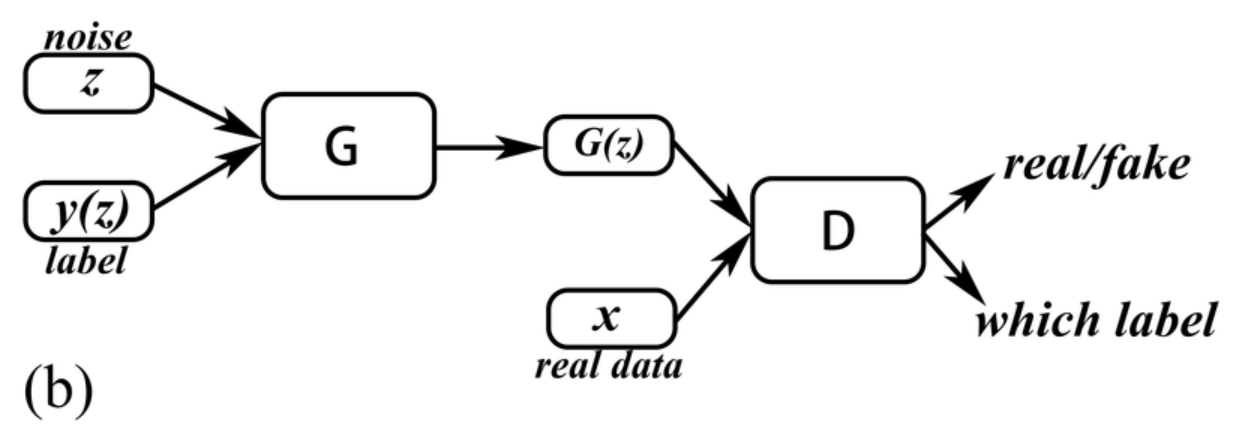

In this section, we will implement a Conditional Generative Adversarial Network (CGAN) to generate fake images of handwritten digits, conditioned on their labels, using the MNIST dataset. This means that we can generate images of specific digits by providing the desired digit label as input to the generator.

The main components of this CGAN include:

1. **Data Preprocessing**: Loading the MNIST dataset with labels and applying necessary transformations.
2. **Generator**: A neural network that takes random noise and a digit label as input and generates an image.
3. **Discriminator**: A neural network that takes an image and a digit label as input and classifies it as real or fake.
4. **Training Loop**: Training the generator and discriminator in alternating steps, taking the digit labels into account.
5. **Results**: Visualizing the generated images conditioned on labels and logging the training process.


In [ ]:
class ConditionalGenerator(nn.Module):
    def __init__(self, z_dim=100, label_dim=10):
        super(ConditionalGenerator, self).__init__()
        self.label_embedding = nn.Embedding(label_dim, label_dim)
        self.model = nn.Sequential(
            nn.Linear(z_dim + label_dim, 128),

            # Hint: Use Linear, BatchNorm1d and proper activation layers
            # Hint: The first layer is given.
            # Your code here [10 score]

        )


    def forward(self, noise, labels):
        labels = self.label_embedding(labels)
        labels = labels.view(labels.size(0), -1)
        gen_input = torch.cat((noise, labels), 1)  # Concatenate along the feature dimension
        img = self.model(gen_input)
        img = img.view(img.size(0), 1, 64, 64)
        return img

In [ ]:
class ConditionalDiscriminator(nn.Module):
    def __init__(self, label_dim=10):
        super(ConditionalDiscriminator, self).__init__()
        self.label_embedding = nn.Embedding(label_dim, label_dim)
        self.model = nn.Sequential(
            # Hint: Use Linear, BatchNorm1d and proper activation layers
            # Hint: You may need use Dropout layers
            # Your code here [10 score]

        )

    def forward(self, img, labels):
        # Concatenate label embedding and image to produce input
        d_in = torch.cat((img.view(img.size(0), -1), self.label_embedding(labels)), -1)
        validity = self.model(d_in)
        return validity

In [ ]:
# Initialize generator and discriminator
generator = ConditionalGenerator().cuda()
discriminator = ConditionalDiscriminator().cuda()

# Loss functions
adversarial_loss = torch.nn.BCELoss()

# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [ ]:
def save_fake_labled_images(epoch=0):
    sample_path = 'cgan/'
    if not os.path.exists(sample_path):
        os.makedirs(sample_path)

    sample_labels = torch.arange(10).type(torch.LongTensor).cuda()
    z = torch.randn(10, 100).cuda()
    gen_imgs = generator(z, sample_labels)

    fig, axs = plt.subplots(1, 10, figsize=(18, 2))

    for i in range(10):
        img = gen_imgs[i].cpu().detach().squeeze().numpy()
        img = (img + 1) / 2
        img = np.clip(img, 0, 1)

        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f"Label: {i}")
        axs[i].axis('off')

    plt.tight_layout()
    plt.savefig(sample_path + f"generated_images_with_labels_{epoch}.png")
    plt.show()

In [ ]:
save_fake_labled_images(epoch=0)

In [ ]:
num_epochs = 20 #change it if you need

# Labels for generated images
sample_labels = torch.randint(0, 10, (32,)).type(torch.LongTensor).cuda()

for epoch in range(200):
    for i, (imgs, labels) in enumerate(data_loader):

        batch_size = imgs.shape[0]

        # Adversarial ground truths
        valid = torch.ones(batch_size, 1).cuda()
        fake = torch.zeros(batch_size, 1).cuda()

        # Train Generator
        optimizer_G.zero_grad()

        # Hint: Sample noise and labels. Generate a batch of images and calculate and backpropagate g_loss
        # Your code here [10 score]


        # Train Discriminator
        optimizer_D.zero_grad()

        # Hint: Pass real and fake images to discriminator and backporpagate sum of real and fake losses
        # Your code here [10 score]


        # Save training progress
        if i % 10 == 0:
            print(f'\rEpoch {epoch+1}, Step {i+1}, D Loss: {d_loss:.4f}, G Loss: {g_loss:.4f}', end='')

    save_fake_labled_images(epoch)

**Question:** [10 score]

With learned insights from the notebook, compare Conditional Generative Adversarial Networks (CGANs) and traditional Generative Adversarial Networks (GANs) in terms of architecture, input data, loss functions, and potential applications.

```
# Your Answer
```

